In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
N =1000
z =np.linspace(0.0,5, N) 
z

array([0.        , 0.00500501, 0.01001001, 0.01501502, 0.02002002,
       0.02502503, 0.03003003, 0.03503504, 0.04004004, 0.04504505,
       0.05005005, 0.05505506, 0.06006006, 0.06506507, 0.07007007,
       0.07507508, 0.08008008, 0.08508509, 0.09009009, 0.0950951 ,
       0.1001001 , 0.10510511, 0.11011011, 0.11511512, 0.12012012,
       0.12512513, 0.13013013, 0.13513514, 0.14014014, 0.14514515,
       0.15015015, 0.15515516, 0.16016016, 0.16516517, 0.17017017,
       0.17517518, 0.18018018, 0.18518519, 0.19019019, 0.1951952 ,
       0.2002002 , 0.20520521, 0.21021021, 0.21521522, 0.22022022,
       0.22522523, 0.23023023, 0.23523524, 0.24024024, 0.24524525,
       0.25025025, 0.25525526, 0.26026026, 0.26526527, 0.27027027,
       0.27527528, 0.28028028, 0.28528529, 0.29029029, 0.2952953 ,
       0.3003003 , 0.30530531, 0.31031031, 0.31531532, 0.32032032,
       0.32532533, 0.33033033, 0.33533534, 0.34034034, 0.34534535,
       0.35035035, 0.35535536, 0.36036036, 0.36536537, 0.37037

In [4]:
def R(z):
    if z <= 1.:
        return 1+2*z
    if z>1 and z<5:
        return (3./4.)*(5 - z)
    if z>=5:
        return 0.0
R(1.01)

2.9925

In [5]:
from scipy.integrate import quad
Om_m=0.308
def DC(zz):

        E = lambda zz :  np.sqrt(Om_m*(1+zz)**3 + (1-Om_m))**(-1)

        result = quad(E, 0, zz)[0]
        return result
DC(0.7)    

0.5829418501172803

In [6]:
def E(z):
    return np.sqrt(Om_m*(1+z)**3 + (1-Om_m))
E(2.4)

3.5773778106316922

In [7]:
def Psquare(z):
    return (4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))**(2)
Psquare(2.2)

16.146794553901568

In [8]:
Norm = quad(Psquare,0,5)[0]
(1./np.sqrt(Norm))

0.13199120743113024

In [9]:
def P(z):
    return (1./np.sqrt(Norm))*(4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))
P(2.1)

0.563981858452628

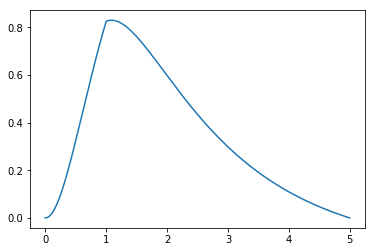

In [10]:
P = (1./np.sqrt(Norm))*np.array([(4.*np.pi*(DC(Z))**(2)*R(Z))*(1+Z)**(-1)*E(Z)**(-1) for Z in z])
plt.plot(z, P)
plt.show()

In [11]:
def P_CDF(z):
    P = lambda z: (1./np.sqrt(Norm))*(4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))
    result = quad(P, 0, z)[0]
    return result

P_CDF(4.7)

1.7779664913324635

In [12]:
def P_CDFSquare(z):
    PSquare = lambda z: (1./np.sqrt(Norm))*(4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))**(2)
    result = quad(PSquare, 0, z)[0]
    return result

P_CDFSquare(4.7)

7.575742621939175

In [13]:
Norm_CDF = quad(P_CDFSquare,0,5)[0]
Norm_CDF

25.779661935875566

In [14]:
def P_CDF(z):
    P = lambda z: (1./np.sqrt(Norm*Norm_CDF))*(4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))
    result = quad(P, 0, z)[0]
    return result

P_CDF(4.7)

0.3501748589845287

In [15]:
from scipy import interpolate

In [16]:
CDF_P = np.vectorize(P_CDF)
CDF_P(z)

array([0.00000000e+00, 1.36558941e-08, 1.09269101e-07, 3.68836973e-07,
       8.74360265e-07, 1.70780013e-06, 2.95103654e-06, 4.68582802e-06,
       6.99377279e-06, 9.95627120e-06, 1.36544894e-05, 1.81693245e-05,
       2.35813704e-05, 2.99708856e-05, 3.74177617e-05, 4.60014930e-05,
       5.58011476e-05, 6.68953393e-05, 7.93622006e-05, 9.32793572e-05,
       1.08723903e-04, 1.25772375e-04, 1.44500735e-04, 1.64984340e-04,
       1.87297929e-04, 2.11515600e-04, 2.37710790e-04, 2.65956256e-04,
       2.96324063e-04, 3.28885561e-04, 3.63711374e-04, 4.00871384e-04,
       4.40434714e-04, 4.82469720e-04, 5.27043974e-04, 5.74224256e-04,
       6.24076540e-04, 6.76665983e-04, 7.32056919e-04, 7.90312848e-04,
       8.51496428e-04, 9.15669463e-04, 9.82892906e-04, 1.05322684e-03,
       1.12673048e-03, 1.20346217e-03, 1.28347938e-03, 1.36683867e-03,
       1.45359573e-03, 1.54380537e-03, 1.63752148e-03, 1.73479707e-03,
       1.83568425e-03, 1.94023423e-03, 2.04849732e-03, 2.16052292e-03,
      

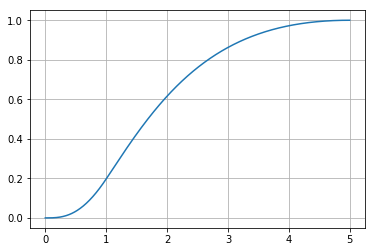

In [17]:
plt.plot(z, (1/np.amax(CDF_P(z)))*CDF_P(z))
plt.grid(True)
plt.show()

In [18]:
CDF_rand = np.sort(np.random.uniform(0,1, N))
CDF_rand

array([0.0019887 , 0.00354027, 0.00374077, 0.00417504, 0.00439788,
       0.00467863, 0.0058733 , 0.00656893, 0.00763743, 0.00832124,
       0.00852957, 0.01179651, 0.01194326, 0.0127111 , 0.01288157,
       0.01342521, 0.01390092, 0.01532089, 0.01547001, 0.01595698,
       0.01639452, 0.01643427, 0.01892656, 0.02031945, 0.02066238,
       0.02152269, 0.02232446, 0.02594686, 0.0284358 , 0.02933065,
       0.03007543, 0.03207219, 0.03274609, 0.03280037, 0.03551291,
       0.03681132, 0.03766921, 0.0379362 , 0.03948255, 0.04197669,
       0.04258559, 0.04259474, 0.04313188, 0.04315351, 0.04474347,
       0.04507891, 0.04510208, 0.04520526, 0.04521365, 0.0484972 ,
       0.04981326, 0.0552379 , 0.05796031, 0.05811302, 0.06018945,
       0.06078092, 0.06152223, 0.06197848, 0.06297604, 0.06334494,
       0.06417263, 0.06489646, 0.06939686, 0.07122159, 0.07261163,
       0.07289112, 0.07395764, 0.07526086, 0.07779963, 0.0792688 ,
       0.0806155 , 0.08193392, 0.08407547, 0.0841525 , 0.08780

In [19]:
z_fid = np.interp(CDF_rand, (1/np.amax(CDF_P(z)))*CDF_P(z),z)
np.mean(z_fid)

1.894896254919389

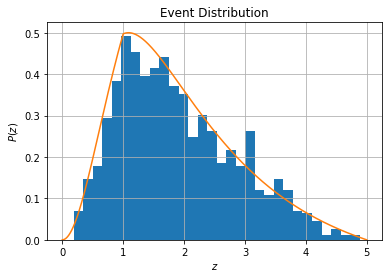

In [74]:
count, bins, ignored = plt.hist(z_fid, 30, normed=True)
plt.plot(z, (0.5/np.amax(P))*P)
plt.grid(True)
plt.xlabel('$z$')
plt.ylabel('$P(z)$')
plt.title('Event Distribution')
plt.show()

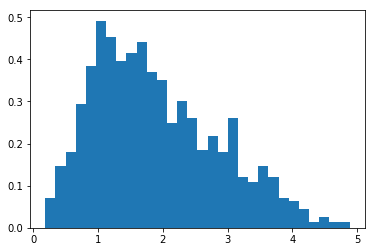

In [21]:
count, bins, ignored = plt.hist(z_fid, 30, normed=True)
#plt.plot(z, P)
plt.show()

In [22]:
# valores em Hz^-1
MPC = 1.0293*10**(14)
M_solar = 4.92535*10**(-6)
h=0.678
H0=(h/3000.)*(1./MPC)
H0

2.1956669581268823e-18

In [23]:
dl = np.array([(1 + Z)*DC(Z) for Z in z_fid])
dl

array([ 0.21223235,  0.26430293,  0.26997515,  0.28170077,  0.28745465,
        0.29445131,  0.32186022,  0.33638732,  0.35714013,  0.36960579,
        0.37326575,  0.42561233,  0.42775487,  0.43880465,  0.44121637,
        0.44877092,  0.45525989,  0.47392173,  0.47583912,  0.48199653,
        0.48744999,  0.48794129,  0.51763459,  0.53335413,  0.53715306,
        0.5464978 ,  0.55504487,  0.59187271,  0.61569629,  0.62400667,
        0.63083311,  0.64872251,  0.6546416 ,  0.6551139 ,  0.67833092,
        0.68913662,  0.69617713,  0.69835694,  0.71081422,  0.73043266,
        0.73513518,  0.73520552,  0.73933442,  0.73950077,  0.75155742,
        0.7540769 ,  0.754251  ,  0.75502639,  0.75508947,  0.77926819,
        0.78875042,  0.82664124,  0.84502163,  0.84604388,  0.85977972,
        0.86366285,  0.86848709,  0.87145413,  0.87789005,  0.88026721,
        0.88555599,  0.89017155,  0.91830981,  0.9294934 ,  0.93792784,
        0.93962025,  0.9460278 ,  0.95380947,  0.96880665,  0.97

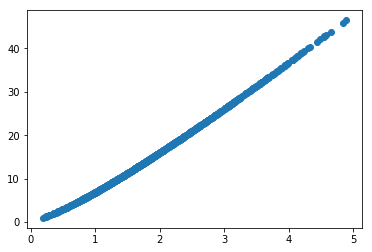

In [24]:
plt.scatter(z_fid, (h/3.)**(-1)*dl)
plt.show()

In [25]:
mu = 5*np.log10((h/3000)**(-1)*dl)+25
mu

array([39.86351568, 40.33996773, 40.38607677, 40.47839795, 40.52230448,
       40.57452525, 40.76779436, 40.8636559 , 40.99365106, 41.06815162,
       41.08954851, 41.3745288 , 41.38543263, 41.44081392, 41.45271591,
       41.48958134, 41.52075476, 41.6079909 , 41.61675851, 41.64467737,
       41.66910813, 41.67129563, 41.79957425, 41.8645361 , 41.87994806,
       41.91739988, 41.95109829, 42.09059937, 42.17629049, 42.20540397,
       42.22903019, 42.28975265, 42.3094758 , 42.31104188, 42.38666588,
       42.42098443, 42.44305656, 42.44984507, 42.48823833, 42.54735871,
       42.56129384, 42.56150161, 42.57366243, 42.57415096, 42.60926864,
       42.61653598, 42.61703727, 42.61926846, 42.61944988, 42.68789254,
       42.71415583, 42.81604314, 42.86379693, 42.86642224, 42.9013938 ,
       42.91117901, 42.92327464, 42.93068047, 42.94665844, 42.95253042,
       42.96553792, 42.97682635, 43.04440393, 43.07068936, 43.09030495,
       43.09421964, 43.1089773 , 43.12676595, 43.16064335, 43.17

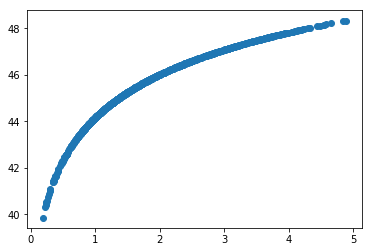

In [26]:
plt.scatter(z_fid, mu)
plt.show()

In [27]:
mass_1 =np.random.uniform(1,2, N)*M_solar
mass_2 = np.random.uniform(1,2, N)*M_solar
M_total = mass_1 + mass_2
eta =((mass_1*mass_2)/(M_total**2))
M_chirp = (1+z_fid)*M_total*eta**(3./5.)
np.amax(mass_1/mass_2), np.amin(mass_1/mass_2)

(1.9325636193420093, 0.5017860013554885)

In [28]:
phi_1 = np.random.uniform(0, 2*np.pi, N)
phi_2 = phi_1 + (2*np.pi/3.)
phi_3 = phi_1 + (4*np.pi/3.)

In [29]:
theta = np.random.uniform(0, np.pi, N)
psi = np.random.uniform(0, 2*np.pi, N)

In [30]:
F1_plus = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_1)*np.cos(2*psi)-np.cos(theta)*np.sin(2*phi_1)*np.sin(2*psi))


In [31]:
F1_times = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_1)*np.sin(2*psi)-np.cos(theta)*np.sin(2*phi_1)*np.cos(2*psi))


In [32]:
Amp_1 = (H0/dl)*np.sqrt(4*F1_plus**2+4*F1_plus**2)*np.sqrt(5*np.pi/96.)*np.pi**(-7./6.)*M_chirp**(5./6.)


In [33]:
# em Hz
f0 = 200
f_lower = 1.
M_obs = (1+z_fid)*M_total
f_LSO = (1./(6.**(3./2.)*2*np.pi*M_obs))
f_upper = 2*f_LSO
x_lower = f_lower/f0
x_upper = f_upper/f0

In [34]:
f = np.linspace(1,10**4, N)
x = f/f0

In [35]:
S0 = 1.449*10**(-52)
p1=-4.05
p2 = -0.69
a1 = 185.62
a2 = 232.56
b1=31.18
b2 = -64.72
b3 = 52.24
b4 = -42.16
b5 = 10.17
b6 = 11.53
c1 = 13.58
c2 = -36.46
c3 = 18.56
c4 = 27.43
def S_h(x):
    return S0*(x**p1 + a1*x**p2 + a2*((1+ b1*x + b2*x**2 + b3*x**3+b4*x**4 + b5*x**5 + b6*x**6)/(1 + c1*x + c2*x**2 + c3*x**3+c4*x**4)))
S_h(239)

8.097623759624806e-46

In [36]:
def h_1(x):
    return Amp_1*(f0*x)**(-7./6.)

In [37]:
rho_1 = np.zeros(len(Amp_1))
for i in range(len(Amp_1)):
    integ_H = lambda y: (4.*f0*(Amp_1[i]*(f0*y)**(-7./6.))**2)/(S_h(y))
    rho_1[i] = np.sqrt(quad(integ_H, x_lower, x_upper[i])[0])
   # print rho_H[i]
rho_1

array([5.97150520e+01, 3.32374843e+01, 3.50788791e+01, 3.96711106e+01,
       3.28901886e+01, 4.13040859e+01, 2.31413702e+01, 2.58723165e+01,
       2.17241098e+01, 1.79130493e+01, 2.67233883e+01, 1.61996123e+01,
       3.30285159e+01, 1.37739780e+01, 3.74518515e+01, 2.79814228e+00,
       2.00898607e+01, 3.03409289e+01, 1.72388840e+01, 1.74060035e+01,
       1.60473906e+01, 3.97976047e+01, 1.65890810e+01, 2.36716750e+01,
       1.22381067e+00, 1.67570644e+01, 1.11774438e+01, 3.97103838e-01,
       8.24729669e+00, 1.16664648e+01, 2.39047030e+01, 7.39130849e+00,
       2.39698885e+01, 1.67586871e+01, 1.98457611e+01, 1.46420917e+01,
       1.14794346e+01, 1.85865774e+01, 2.48474713e+00, 2.04887968e+01,
       5.43433031e+00, 3.01506615e+00, 3.43337582e+00, 1.09009193e+00,
       1.34067169e+01, 1.96245049e+01, 2.42226533e+01, 1.55488864e+01,
       8.60438549e+00, 1.66724630e+01, 2.06374419e+01, 2.14986870e+01,
       6.89283585e+00, 2.26424545e+00, 1.44340386e+01, 9.18440307e+00,
      

In [38]:
F2_plus = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_2)*np.cos(2*psi)-np.cos(theta)*np.sin(2*phi_2)*np.sin(2*psi))


In [39]:
F2_times = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_2)*np.sin(2*psi)-np.cos(theta)*np.sin(2*phi_2)*np.cos(2*psi))


In [40]:
Amp_2 = (H0/dl)*np.sqrt(4*F2_plus**2+4*F2_plus**2)*np.sqrt(5*np.pi/96.)*np.pi**(-7./6.)*M_chirp**(5./6.)


In [41]:
def h_2(x):
    return Amp_2*(f0*x)**(-7./6.)

In [42]:
rho_2 = np.zeros(len(Amp_2))
for i in range(len(Amp_2)):
    integ_2 = lambda y: (4.*f0*(Amp_2[i]*(f0*y)**(-7./6.))**2)/(S_h(y))
    rho_2[i] = np.sqrt(quad(integ_2, x_lower, x_upper[i])[0])
   # print rho_H[i]
rho_2

array([6.54179236e+01, 1.03769438e+01, 3.78696029e+01, 3.41073851e+01,
       1.89758036e-01, 9.93236171e+00, 2.95376401e+01, 2.51206378e+01,
       3.28059716e+01, 2.31857725e+01, 4.78761516e-01, 3.32907802e+01,
       1.96539564e+01, 1.46140785e+00, 8.45022640e+00, 4.53209000e+00,
       2.35140148e+01, 6.02650837e+00, 2.08338774e+01, 8.92492423e+00,
       1.12581757e+01, 3.68077755e+01, 2.51684336e+00, 8.42103943e+00,
       1.91525735e+01, 1.01280937e+01, 3.74508501e+01, 1.62291791e+01,
       2.42800717e+01, 1.47520171e+01, 7.68601824e+00, 2.38481931e+01,
       2.18121306e+01, 1.40450075e+01, 1.12544964e+01, 2.15469463e+00,
       1.14222956e+01, 2.95997167e+01, 1.05636999e+01, 1.42501032e+01,
       6.86971469e+00, 2.11550535e+01, 2.12865773e+00, 1.48046071e+01,
       2.85029012e+01, 1.19214198e+01, 1.58266189e+01, 1.14451298e+01,
       1.59089776e+01, 6.66918965e+00, 1.38847906e+01, 1.02391778e+00,
       3.51384676e+00, 1.16624073e+01, 1.41569652e+01, 4.62339999e+00,
      

In [43]:
rho_2 = np.zeros(len(Amp_2))
for i in range(len(Amp_2)):
    integ_2 = lambda y: (4.*f0*(Amp_2[i]*(f0*y)**(-7./6.))**2)/(S_h(y))
    rho_2[i] = np.sqrt(quad(integ_2, x_lower, x_upper[i])[0])
   # print rho_H[i]
rho_2

array([6.54179236e+01, 1.03769438e+01, 3.78696029e+01, 3.41073851e+01,
       1.89758036e-01, 9.93236171e+00, 2.95376401e+01, 2.51206378e+01,
       3.28059716e+01, 2.31857725e+01, 4.78761516e-01, 3.32907802e+01,
       1.96539564e+01, 1.46140785e+00, 8.45022640e+00, 4.53209000e+00,
       2.35140148e+01, 6.02650837e+00, 2.08338774e+01, 8.92492423e+00,
       1.12581757e+01, 3.68077755e+01, 2.51684336e+00, 8.42103943e+00,
       1.91525735e+01, 1.01280937e+01, 3.74508501e+01, 1.62291791e+01,
       2.42800717e+01, 1.47520171e+01, 7.68601824e+00, 2.38481931e+01,
       2.18121306e+01, 1.40450075e+01, 1.12544964e+01, 2.15469463e+00,
       1.14222956e+01, 2.95997167e+01, 1.05636999e+01, 1.42501032e+01,
       6.86971469e+00, 2.11550535e+01, 2.12865773e+00, 1.48046071e+01,
       2.85029012e+01, 1.19214198e+01, 1.58266189e+01, 1.14451298e+01,
       1.59089776e+01, 6.66918965e+00, 1.38847906e+01, 1.02391778e+00,
       3.51384676e+00, 1.16624073e+01, 1.41569652e+01, 4.62339999e+00,
      

In [44]:
F3_plus = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_3)*np.cos(2*psi)-np.cos(theta)*np.sin(2*phi_3)*np.sin(2*psi))


In [45]:
F3_times = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_3)*np.sin(2*psi)-np.cos(theta)*np.sin(2*phi_3)*np.cos(2*psi))


In [46]:
Amp_3 = (H0/dl)*np.sqrt(4*F3_plus**2+4*F3_plus**2)*np.sqrt(5*np.pi/96.)*np.pi**(-7./6.)*M_chirp**(5./6.)


In [47]:
def h_3(x):
    return Amp_3*(f0*x)**(-7./6.)

In [48]:
rho_3 = np.zeros(len(Amp_3))
for i in range(len(Amp_3)):
    integ_3 = lambda y: (4.*f0*(Amp_3[i]*(f0*y)**(-7./6.))**2)/(S_h(y))
    rho_3[i] = np.sqrt(quad(integ_3, x_lower, x_upper[i])[0])
   # print rho_H[i]
rho_3

array([5.70287154e+00, 4.36144281e+01, 2.79072384e+00, 5.56372551e+00,
       3.30799466e+01, 3.13717242e+01, 5.26790103e+01, 7.51678776e-01,
       5.45300814e+01, 4.10988218e+01, 2.72021498e+01, 1.70911679e+01,
       1.33745595e+01, 1.52353858e+01, 2.90016251e+01, 7.33023228e+00,
       3.42415403e+00, 2.43144205e+01, 3.59499343e+00, 8.48107923e+00,
       4.78921489e+00, 2.98982921e+00, 1.91059244e+01, 3.20927145e+01,
       1.79287628e+01, 2.68851580e+01, 2.62734063e+01, 1.58320753e+01,
       1.60327750e+01, 2.64184818e+01, 1.62186848e+01, 1.64568846e+01,
       2.15775783e+00, 2.71367962e+00, 8.59126472e+00, 1.24873970e+01,
       5.71390179e-02, 1.10131392e+01, 1.30484471e+01, 6.23869355e+00,
       1.43538438e+00, 1.81399874e+01, 5.56203356e+00, 1.37145151e+01,
       1.50961843e+01, 3.15459247e+01, 8.39603448e+00, 4.10375665e+00,
       7.30459206e+00, 2.33416527e+01, 6.75265129e+00, 2.25226048e+01,
       1.04066826e+01, 9.39816181e+00, 2.77073477e-01, 1.38078031e+01,
      

In [49]:
rho_tot = np.sqrt(rho_1**2+rho_2**2+rho_3**2)
rho_tot

array([88.75761889, 55.80886729, 51.69548069, 52.61241088, 46.6485089 ,
       52.80969993, 64.676683  , 36.06921438, 67.24357588, 50.47346365,
       38.13562181, 40.77758584, 40.69446778, 20.59065718, 48.11592008,
        9.06100134, 31.11649443, 39.34567084, 27.27917792, 21.32022359,
       20.17924287, 54.29181115, 25.4277104 , 40.75787561, 26.26326936,
       33.25942289, 47.09345291, 22.67594658, 30.24218345, 32.42937852,
       29.89239771, 29.90312368, 32.48046361, 22.03360805, 24.37883817,
       19.36410705, 16.19411993, 36.64550891, 16.97137873, 25.72503708,
        8.8761058 , 28.03009199,  6.87426145, 20.21021071, 34.92921723,
       39.01777553, 30.12826238, 19.73827964, 19.5061037 , 29.44964966,
       25.77381851, 31.15300425, 12.96754981, 15.14806905, 20.21974046,
       17.21582158, 30.21265622, 23.33326028, 28.2101422 , 14.34634991,
       19.81453305, 33.54512482, 27.40459075, 22.71044018, 24.97106085,
       21.34472844, 10.74842541, 29.00020738, 29.48439299, 12.52

In [50]:
sigma_dl = np.sort(np.sqrt(((2*dl)/rho_tot)**2 +(0.05*z_fid*dl)**2))
np.amax(sigma_dl), np.amin(sigma_dl)

(29.22609151111528, 0.0051780776673908705)

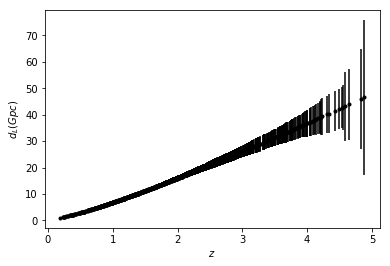

In [51]:
plt.errorbar(z_fid, (h/3)**(-1)*dl, sigma_dl,  fmt=".k")
plt.xlabel('$z$')
plt.ylabel('$d_L(Gpc)$')
#plt.ylim((0,100))
plt.show()

In [52]:
sigma_mu = np.sort((5./np.log(10))*(sigma_dl/dl))
np.amax(sigma_mu), np.amin(sigma_mu)

(6.040146034835067, 0.05297992036421752)

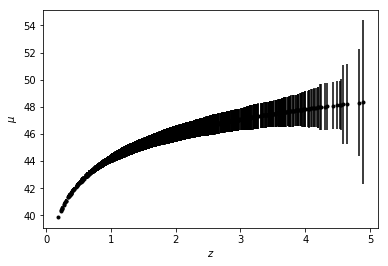

In [53]:
plt.errorbar(z_fid, mu, sigma_mu, fmt='.k')
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.show()

In [54]:
dl_fid = np.sqrt((np.random.normal(dl, sigma_dl))**2)
#dl = np.array([(1 + Z)*DC(Z) for Z in z_eff]) + np.random.normal(0, sigma_dl, N)
np.amin(dl_fid)

0.00520191801673775

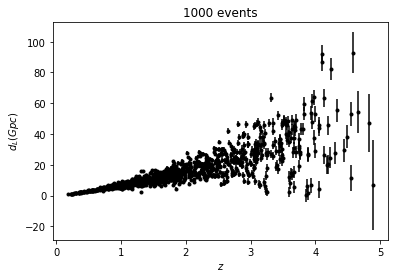

In [55]:
plt.errorbar(z_fid, (h/3)**(-1)*dl_fid, sigma_dl,  fmt=".k")
plt.xlabel('$z$')
plt.ylabel('$d_L(Gpc)$')
plt.savefig('dL(z)-1000vents')
#plt.ylim((0,50))
plt.title('1000 events')
plt.show()

In [64]:
mu_fid = np.random.normal(mu, sigma_mu, N)
#mu = 5*np.log10((h/3000)**(-1)*dl)+25
np.amax(mu_fid), np.amin(mu_fid)
#len(mu_fid)/

(49.90046647969173, 39.9076069208434)

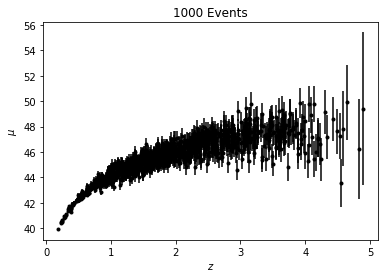

In [65]:
plt.errorbar(z_fid, mu_fid, sigma_mu, fmt='.k')
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.savefig('mu(z)-1000Events')
#plt.ylim((40,55))
plt.title('1000 Events')
plt.show()

In [67]:
import emcee
c = 3.e5
def DC(zz, Om_mat):

        E = lambda zz :  np.sqrt(Om_mat*(1+zz)**3 + (1-Om_mat))**(-1)

        result = quad(E, 0, zz)[0]
        return result

def lnlike(theta, z_fid, mu_fid, sigma_mu):
    Om_mat, H_0 = theta
    

    dl = (c/H_0)*np.array([(1 + Z)* DC(Z, Om_mat) for Z in z_fid])

    mu = 5*np.log10(dl)+25
    
    #S0 = np.sum(1./sigma_mu**2)
    #S1 = np.sum((mu - mu_fid)/sigma_mu**2)
    #S2 = np.sum((mu - mu_fid)**2/sigma_mu**2)
    
    #result = -0.5*(S2 - S1**2/S0)
    result = -0.5 * np.sum((mu-mu_fid)**2/sigma_mu**2)
    #print(result) 
    return result

In [68]:
#priors

def lnprior(theta):
    Om_mat, H_0 = theta
    if 0.0 < Om_mat < 1.0 and 20.0 <= H_0 <= 100.0: 
        return 0.0
    return -np.inf

#posterior

def lnprob(theta, z_fid, mu_fid, sigma_mu):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, z_fid, mu_fid, sigma_mu)

In [69]:
#cadeia de Markov

set_ini = 0.3, 70.0

ndim, nwalkers = 2, 8
pos = [set_ini + 1e-2*np.random.randn(ndim) for i in range(nwalkers)]


sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(z_fid, mu_fid, sigma_mu))
sampler.run_mcmc(pos, 5000)

samples = sampler.chain[:, 500:, :].reshape((-1, ndim))

np.savetxt("chainGWLCDM1000.txt",samples)

In [70]:
Om_mat_mcmc, H_0_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))

In [71]:
Om_mat_mcmc, H_0_mcmc

((0.3239156344834101, 0.023258439031737188, 0.021524558109935588),
 (66.86006221052202, 0.7784727764469181, 0.7885173961423959))

/home/riisrhavia/.local/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


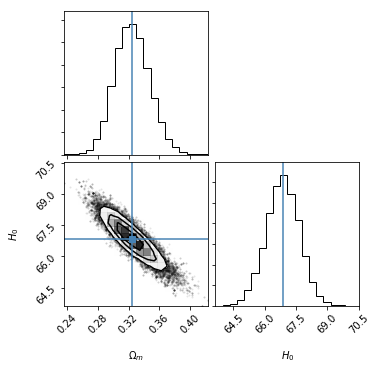

In [73]:
import corner
fig = corner.corner(samples, labels=["$\Omega_m$", "$H_0$"],
                    truths=[Om_mat_mcmc[0], H_0_mcmc[0]])
fig.savefig("ParametersLCDM1000.png")
fig.show()